In [74]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import json
from pandas.io.json import json_normalize
from selenium import webdriver
import time
import re
import matplotlib.pyplot as plt

# 유가증권 기업코드 가져오기

In [75]:
file_path = 'C:/Users/elris/Python/Untitled Folder/상장법인목록.xlsx'

df = pd.read_excel(file_path, sheet_name='Sheet1')
test_data = df[:20]
test_data

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,케이씨씨글라스,344820,유리 및 유리제품 제조업,판유리 등,2020-01-21,12월,김내환,http://www.kccglass.co.kr,서울특별시
1,NH프라임리츠,338100,부동산 임대 및 공급업,부동산 투자,2019-12-05,11월,박영희,http://www.nhreits.com,서울특별시
2,센트랄모텍,308170,자동차 신품 부품 제조업,"이너레이스, 오디 클러치보스, 로터샤프트, 슬리브기어, 컨트롤 암, 엑슬",2019-11-25,12월,이종철,http://www.centralmotek.co.kr,울산광역시
3,현대에너지솔루션,322000,반도체 제조업,"태양광 셀·모듈, PV시스템, ESS",2019-11-19,12월,강철호,http://www.hyundai-es.co.kr/,경기도
4,한화시스템,272210,"측정, 시험, 항해, 제어 및 기타 정밀기기 제조업; 광학기기 제외","정밀기기(육해공군관련전자제어시스템,열영상감시장비,탐지추적장치,전투지휘체계시스템) 제조",2019-11-13,12월,김연철,http://hanwhasystems.com,경상북도
5,자이에스앤디,317400,부동산 임대 및 공급업,"부동산 관리, 정보통신 공사, 아파트 AS 및 옵션 제품 공급, 건축물 시공 및 분양",2019-11-06,12월,김환열,http://www.xisnd.com/,서울특별시
6,롯데리츠,330590,부동산 임대 및 공급업,부동산투자,2019-10-30,06월,롯데에이엠씨 주식회사,http://www.lottereit.co.kr/,서울특별시
7,지누스,13890,가구 제조업,매트리스 및 가구제품,2019-10-30,12월,이윤재,http://www.zinus.co.kr,경기도
8,두산솔루스,336370,전자부품 제조업,"동박, 유압기기 등",2019-10-18,12월,이윤석,http://www.doosansolus.com,전라북도
9,두산퓨얼셀,336260,"전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업",연료전지,2019-10-18,12월,유수경,http://www.doosanfuelcell.com,전라북도


# 기업년도별 사업보고서 가져오기

In [141]:
import re
from bs4 import BeautifulSoup
import requests
import json
import time
import pandas as pd

data = pd.DataFrame()
for num,i in enumerate(test_data['종목코드']) :    
    time.sleep(1)
#     print(num)
    api_code = '7e7a428985c5fa953bc7ab6078ee106e9de7d13e'
    start_date = '19900101'
    crp_code = '0'*(6-len(str(i))) + str(i)
    url = 'http://dart.fss.or.kr/api/search.json?auth='+api_code+'&crp_cd='+crp_code+'&start_dt='+start_date+'&bsn_tp=A001'
    req = requests.get(url)
    html = req.text
    code = json.loads(html)
    soup = BeautifulSoup(html,'html.parser')
    for t in code['list']:
        temp = pd.DataFrame(([[t['crp_cls'],t['crp_nm'],t['crp_cd'],t['rpt_nm'],t['rcp_no'],t['flr_nm'],t['rcp_dt'],t['rmk']]])
                            ,columns=["crp_cls","crp_nm","crp_cd","rpt_nm","rcp_no","flr_nm","rcp_dt","rmk"])
        data = pd.concat([data,temp])
    data.reset_index(drop=True,inplace=True)

for i in range(0, len(data)) : 
    if len(data['rpt_nm'][i]) > 20 : 
        data.drop([i], inplace=True)
data.reset_index(drop=True,inplace=True)  

display(data)

,crp_cls,crp_nm,crp_cd,rpt_nm,rcp_no,flr_nm,rcp_dt,rmk
0,Y,지누스,013890,사업보고서 (2018.12),20190401004071,지누스,20190401,정연
1,Y,지누스,013890,사업보고서 (2017.12),20180402005273,지누스,20180402,정연
2,Y,지누스,013890,사업보고서 (2016.12),20170331004281,지누스,20170331,정연
3,Y,제이콘텐트리,036420,사업보고서 (2018.12),20190401004270,제이콘텐트리,20190401,정연
4,Y,제이콘텐트리,036420,사업보고서 (2017.12),20180402004265,제이콘텐트리,20180402,연
5,Y,제이콘텐트리,036420,사업보고서 (2016.12),20170331004977,제이콘텐트리,20170331,정연
6,Y,제이콘텐트리,036420,사업보고서 (2015.12),20160330003573,제이콘텐트리,20160330,정연
7,Y,제이콘텐트리,036420,사업보고서 (2014.12),20150331004337,제이콘텐트리,20150331,연
8,Y,제이콘텐트리,036420,사업보고서 (2013.12),20140331002484,제이콘텐트리,20140331,연
9,Y,제이콘텐트리,036420,사업보고서 (2012.12),20130401002152,제이콘텐트리,20130401,연


# 해당 사업보고서에서 이사의 경영진단 part  url 파라메터 가져오기

In [142]:
rcpNo_list=[]
dcmNo_list=[]
eleId_list=[]
offset_list=[]
length_list=[]
dtd_list=[]
for i in range(0,len(data)) : 
    try : 
        time.sleep(1)
#         print(i)
        start_date = '19900101'
        crp_code = data['crp_cd'][i]
        rcpNo = data['rcp_no'][i]
        url = 'http://dart.fss.or.kr/dsaf001/main.do?'+'&rcpNo='+rcpNo+'&crp_cd='+crp_code
        req =requests.get(url)
        html = req.text
        soup = BeautifulSoup(html,'html.parser')
        soup.find('head')
        body = str(soup.find('head')).split('이사의 경영진단 및 분석의견",')[1].split('cnt++')[0].split('viewDoc(')[1].split(')')[0].split(', ')
        body = [body[i][1:-1] for i in range(len(body))]     
        rcpNo_list.append(body[0]) 
        dcmNo_list.append(body[1])
        eleId_list.append(body[2])
        offset_list.append(body[3])
        length_list.append(body[4])
        dtd_list.append(body[5])
    except KeyError:
        data.drop([i], inplace=True)
        continue
    except IndexError:
        data.drop([i], inplace=True)
        continue
data = data.reset_index(drop=True, inplace=False)
data['dcmNo'] = dcmNo_list
data['eleld'] = eleId_list
data['offset'] = offset_list
data['length'] = length_list
data['dtd'] = dtd_list
display(data)

,crp_cls,crp_nm,crp_cd,rpt_nm,rcp_no,flr_nm,rcp_dt,rmk,dcmNo,eleld,offset,length,dtd
0,Y,지누스,013890,사업보고서 (2018.12),20190401004071,지누스,20190401,정연,6612621,18,1072993,11386,dart3.xsd
1,Y,지누스,013890,사업보고서 (2017.12),20180402005273,지누스,20180402,정연,6061284,19,1000928,11327,dart3.xsd
2,Y,지누스,013890,사업보고서 (2016.12),20170331004281,지누스,20170331,정연,5539159,19,645468,12210,dart3.xsd
3,Y,제이콘텐트리,036420,사업보고서 (2018.12),20190401004270,제이콘텐트리,20190401,정연,6613787,18,1316291,19303,dart3.xsd
4,Y,제이콘텐트리,036420,사업보고서 (2017.12),20180402004265,제이콘텐트리,20180402,연,6057075,19,1266419,19604,dart3.xsd
5,Y,제이콘텐트리,036420,사업보고서 (2016.12),20170331004977,제이콘텐트리,20170331,정연,5542781,19,1535823,19481,dart3.xsd
6,Y,제이콘텐트리,036420,사업보고서 (2015.12),20160330003573,제이콘텐트리,20160330,정연,5026283,19,1626053,18947,dart3.xsd
7,Y,제이콘텐트리,036420,사업보고서 (2014.12),20150331004337,제이콘텐트리,20150331,연,4563482,19,1563554,20006,dart3.xsd
8,Y,제이콘텐트리,036420,사업보고서 (2013.12),20140331002484,제이콘텐트리,20140331,연,4114982,13,281654,19012,dart3.xsd
9,Y,제이콘텐트리,036420,사업보고서 (2012.12),20130401002152,제이콘텐트리,20130401,연,3710232,13,348565,19240,dart3.xsd


# 이사의 경영진단 part 텍스트화 후 데이터 프레임에 저장

In [143]:
text_list=[] 
num = len(data)
for i in range(0,num) : 
#     print(i)
    time.sleep(1)
    target_url = 'http://dart.fss.or.kr/report/viewer.do?'
    params = {
        'rcpNo': data['rcp_no'][i],
        'dcmNo': data['dcmNo'][i],
        'eleId' : data['eleld'][i],
        'offset' : data['offset'][i],
        'length' : data['length'][i],
        'dtd' : data['dtd'][i]
    }
    resp = requests.get(target_url, params=params)
    dom = BeautifulSoup(resp.text,'html.parser')

    all_content = list(dom)
    content_list = []
    for i in all_content : 
        str_content = str(i).split('\n')
        content = str_content
        content_list += content

    table = dom.find_all('table')
    table_str = str(table)
    table_split = table_str.split('\n')
    table_list = table_split

    del_list = []
    for x in content_list : 
        if x in table_list : 
            del_list.append(x)
    for d in del_list :
        content_list.remove(d)
    text = str(content_list)


    def cleanr(content):
        cleanr = re.compile('<.*?>')
        cleantext = re.sub(cleanr, '', content)
        return cleantext

    def clean_space(content):
        cleanrr = re.compile('[\n]|[\\xa0]|[\']')
        cleantext = re.sub(cleanrr, '', content)
        return cleantext

    def clean_space2(content):
        cleanrr = re.compile('[\\xa0 ]|[ \\xa0]')
        cleantext = re.sub(cleanrr, '', content)
        return cleantext

    text = cleanr(text)
    md_text = clean_space(text)
    clean_text = clean_space(md_text)
    clean_text = clean_text.replace(u'\\xa0', u'')
    del_text = clean_text[:100]
    final_text = clean_text.replace(del_text,"")
    text_list.append(final_text)
data['text'] = text_list
print(data['text'][0])
display(data)

, , , , , , , , , IV. 이사의 경영진단 및 분석의견, 1. 예측정보에 대한 주의사항  당사가 본 경영진단의견서에서 미래에 발생할 것으로 예측하여 기재 또는 표시한 내용은 동 의견서 작성시점의 사건 및 재무성과에 대한 회사의 의견을 반영한 것입니다. 동 예측정보는 미래의 경영환경과 관련된 다양한 가정에 기초하고 있으며, 이러한 가정들은 동 의견서 작성시점의 합리적인 근거에 기초하였지만 외부 환경, 회사 내부경영과 관련된 요인 및 기타 변수로 인하여 결과적으로 부정확한 것으로 판명될 수도 있습니다. 당사는 동 의견서의 예측정보 작성시점 이후에 발생하는 위험 또는 불확실성을 반영하기 위하여 예측정보에 기재한 사항을 수정하는 정정보고서를 공시할 의무는 없습니다. 결론적으로, 이러한 주의문구는 모든 예측정보에 대하여 적용되며, 동 의견서상에서 회사가 예상한 결과 또는 사항이 실현되거나 회사가 당초에 예상한 영향이 발생한다는 확신을 제공할 수 없습니다. 동 의견서에 기재된 예측정보는 동 의견서 작성시점을 기준으로 작성한 것이며, 회사가 이러한 위험요인이나 예측정보를 업데이트할 책임이 없음을 유의하시기 바랍니다. , 2. 개요, 회사는 2017년 1월1일 이후에 개시하는 연차보고기간부터 국제회계기준을 채택하여 제정한 한국채택국제회계기준을 적용하고 있습니다. 2018년 회사의 매출은 6천218억원으로 전년대비 3.2% 성장하였습니다. 이는 오랜기간 동안에 자체 상표에 의하여 미국 On-line 시장을 집중적으로 공략하였던 회사의 영업전략과 꾸준한 R&amp;D연구와 신제품 출시로 사업영역 확장에 의한 성장입니다. 회사는 온라인 중심의 영업전략으로 성과를 거두고, 그 동안 수십 년간 주문자 상표에 의존하던 생산 및 영업방식은 최근 수년간의 노력과 투자에 의하여 자체상표 중심의 사업체제로 바뀌어 2018년에는 98%이상이 자체브랜드 판매로 전환되어 치열한 세계 선진 침대 시장의 경쟁속에서 지누스가 온라인 유통채널에서도 제1의 침실가구판매업체로 변신하여 과거 베개

,crp_cls,crp_nm,crp_cd,rpt_nm,rcp_no,flr_nm,rcp_dt,rmk,dcmNo,eleld,offset,length,dtd,text
0,Y,지누스,013890,사업보고서 (2018.12),20190401004071,지누스,20190401,정연,6612621,18,1072993,11386,dart3.xsd,", , , , , , , , , IV. 이사의 경영진단 및 분석의견, 1. 예측정보..."
1,Y,지누스,013890,사업보고서 (2017.12),20180402005273,지누스,20180402,정연,6061284,19,1000928,11327,dart3.xsd,", , , , , , , , , V. 이사의 경영진단 및 분석의견, , 1. 예측정..."
2,Y,지누스,013890,사업보고서 (2016.12),20170331004281,지누스,20170331,정연,5539159,19,645468,12210,dart3.xsd,", , , , , , , , , V. 이사의 경영진단 및 분석의견, , 1. 예측정..."
3,Y,제이콘텐트리,036420,사업보고서 (2018.12),20190401004270,제이콘텐트리,20190401,정연,6613787,18,1316291,19303,dart3.xsd,", , , , , , , , , IV. 이사의 경영진단 및 분석의견, , , ""1...."
4,Y,제이콘텐트리,036420,사업보고서 (2017.12),20180402004265,제이콘텐트리,20180402,연,6057075,19,1266419,19604,dart3.xsd,", , , , , , , , , V. 이사의 경영진단 및 분석의견, , ""1. 예측..."
5,Y,제이콘텐트리,036420,사업보고서 (2016.12),20170331004977,제이콘텐트리,20170331,정연,5542781,19,1535823,19481,dart3.xsd,", , , , , , , , , V. 이사의 경영진단 및 분석의견, , , 1. 예..."
6,Y,제이콘텐트리,036420,사업보고서 (2015.12),20160330003573,제이콘텐트리,20160330,정연,5026283,19,1626053,18947,dart3.xsd,", , , , , , , , , V. 이사의 경영진단 및 분석의견, 1. 예측정보에..."
7,Y,제이콘텐트리,036420,사업보고서 (2014.12),20150331004337,제이콘텐트리,20150331,연,4563482,19,1563554,20006,dart3.xsd,", , , , , , , , , V. 이사의 경영진단 및 분석의견, , , 1. 예..."
8,Y,제이콘텐트리,036420,사업보고서 (2013.12),20140331002484,제이콘텐트리,20140331,연,4114982,13,281654,19012,dart3.xsd,", , , , , , , , , V. 이사의 경영진단 및 분석의견, 1. 예측정보에..."
9,Y,제이콘텐트리,036420,사업보고서 (2012.12),20130401002152,제이콘텐트리,20130401,연,3710232,13,348565,19240,dart3.xsd,", , , , , , , , , V. 이사의 경영진단 및 분석의견, 1. 예측정보에..."


In [144]:
import os
os.chdir('C:/Users/elris/Anaconda3/Lib/site-packages')
!pip install mecab python-0.996_ko_0.9.2_msvc-cp37-cp37m-win_amd64.whl
import MeCab
mecab = MeCab.Tagger()

  Using cached https://files.pythonhosted.org/packages/46/92/02b78f00cf2154831f416e484c6e372b93a8c24edaf969e44093d1482673/mecab-0.996-cp37-cp37m-win_amd64.whl
Processing c:\users\elris\anaconda3\lib\site-packages\python-0.996_ko_0.9.2_msvc-cp37-cp37m-win_amd64.whl


Requirement 'python-0.996_ko_0.9.2_msvc-cp37-cp37m-win_amd64.whl' looks like a filename, but the file does not exist
Could not install packages due to an EnvironmentError: [Errno 2] No such file or directory: 'C:\\Users\\elris\\Anaconda3\\Lib\\site-packages\\python-0.996_ko_0.9.2_msvc-cp37-cp37m-win_amd64.whl'



In [145]:
sample_data = data[data['crp_nm'] == '포스코케미칼']
sample_data = sample_data.sort_values(by = 'rcp_dt', ascending = True)
sample_data = sample_data.reset_index(drop=True, inplace=False)
sample_data

,crp_cls,crp_nm,crp_cd,rpt_nm,rcp_no,flr_nm,rcp_dt,rmk,dcmNo,eleld,offset,length,dtd,text
0,Y,포스코케미칼,003670,사업보고서 (2012.12),20130328000761,포스코케미칼,20130328,연,3688869,13,247942,21710,dart3.xsd,", , , , , , , , , V. 이사의 경영진단 및 분석의견, , 1. 예측정..."
1,Y,포스코케미칼,003670,사업보고서 (2013.12),20140328001243,포스코케미칼,20140328,정연,4101074,13,229521,28233,dart3.xsd,", , , , , , , , , V. 이사의 경영진단 및 분석의견, , 1. 예측정..."
2,Y,포스코케미칼,003670,사업보고서 (2014.12),20150331002855,포스코케미칼,20150331,연,4556330,19,1026021,35411,dart3.xsd,", , , , , , , , , V. 이사의 경영진단 및 분석의견, , 1. 예측정..."
3,Y,포스코케미칼,003670,사업보고서 (2015.12),20160330004396,포스코케미칼,20160330,연,5030550,19,1153211,37457,dart3.xsd,", , , , , , , , , V. 이사의 경영진단 및 분석의견, , 1. 예측정..."
4,Y,포스코케미칼,003670,사업보고서 (2016.12),20170331003706,포스코케미칼,20170331,연,5536282,19,1193520,32690,dart3.xsd,", , , , , , , , , V. 이사의 경영진단 및 분석의견, , 1. 예측정..."
5,Y,포스코케미칼,003670,사업보고서 (2017.12),20180330003359,포스코케미칼,20180330,정연,6040070,19,1202220,63988,dart3.xsd,", , , , , , , , , V. 이사의 경영진단 및 분석의견, 1. 예측정보에..."
6,Y,포스코케미칼,003670,사업보고서 (2018.12),20190329004409,포스코케미칼,20190401,연,6595330,18,1298810,68203,dart3.xsd,", , , , , , , , , IV. 이사의 경영진단 및 분석의견, 1. 예측정보..."


# 자카드 유사도

In [146]:
from ekonlpy.tag import Mecab
mecab = Mecab()
posco_list = []
for num,i in enumerate(sample_data['text']) :
    token = mecab.pos(i)
    mecab.sent_words(token)
    mecab.replace_synonyms(token)
    posco_list.append(mecab.lemmatize(token))
posco_sim = []

for num in range(0, len(posco_list)) : 
    if num == 0 :
        pass
    else : 
        union = set(posco_list[num-1]).union(set(posco_list[num]))
        intersection = set(posco_list[num-1]).intersection(set(posco_list[num]))
        jaccard_sim = len(intersection)/len(union)
        posco_sim.append(jaccard_sim)
        
posco_sim

[0.4175392670157068,
 0.49560117302052786,
 0.6312594840667678,
 0.7379310344827587,
 0.484394506866417,
 0.5079962370649106]

In [147]:
!pip install pykrx
from pykrx import stock
import pandas as pd
%matplotlib inline
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
from datetime import datetime
from pandas_datareader import data

<function matplotlib.pyplot.show(*args, **kw)>

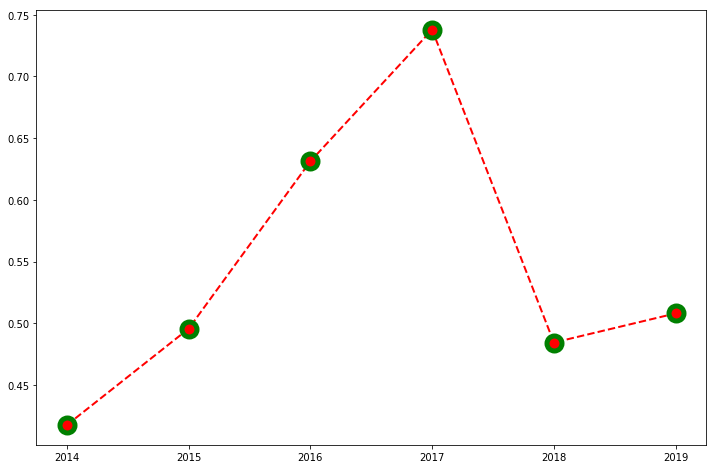

In [148]:
sim_df = pd.DataFrame(posco_sim, index = ['2014','2015','2016','2017','2018','2019'])
plt.figure(figsize = (12,8))
plt.plot(sim_df, c="r", lw=2, ls="--", marker="o", ms=15, mec="g", mew=5, mfc="r")
plt.show

In [149]:
posco_df = stock.get_market_ohlcv_by_date("20140101", "20181231", "003670")

<function matplotlib.pyplot.show(*args, **kw)>

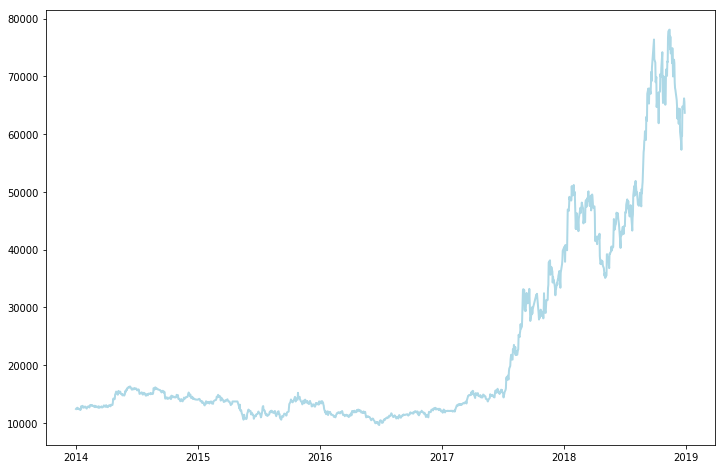

In [150]:
plt.figure(figsize = (12,8))
plt.plot(posco_df.index, posco_df['종가'],color = 'lightblue',linewidth=2)
plt.show

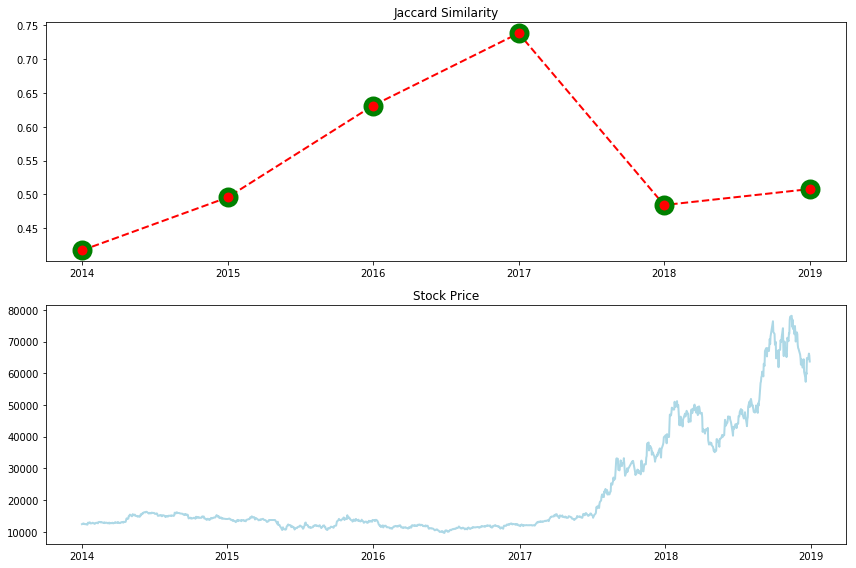

In [151]:
plt.figure(figsize = (12,8))
plt.subplot(2, 1, 1)
plt.plot(sim_df, c="r", lw=2, ls="--", marker="o", ms=15, mec="g", mew=5, mfc="r")
plt.title('Jaccard Similarity')
plt.subplot(2, 1, 2)

plt.plot(posco_df.index, posco_df['종가'],color = 'lightblue',linewidth=2)
plt.title('Stock Price')

plt.tight_layout()
plt.show()